In [1]:
import tensorflow as tf

# Check available GPUs
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # Set the GPU to use
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    print("Using GPU")
else:
    print("GPU not available")


Using GPU


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install xgboost

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import seaborn as sns
import sklearn
import imblearn
import matplotlib.pyplot as plt
import time
import sklearn.metrics as m
import xgboost as xgb
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df1=pd.read_csv("/content/drive/MyDrive/Mini Project/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")#,nrows = 50000
df2=pd.read_csv("/content/drive/MyDrive/Mini Project/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/drive/MyDrive/Mini Project/Friday-WorkingHours-Morning.pcap_ISCX.csv")
#df4=pd.read_csv("/content/drive/MyDrive/Mini Project/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/content/drive/MyDrive/Mini Project/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/content/drive/MyDrive/Mini Project/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
#df7=pd.read_csv("/content/drive/MyDrive/Mini Project/Tuesday-WorkingHours.pcap_ISCX.csv")
#df8=pd.read_csv("/content/drive/MyDrive/Mini Project/Wednesday-workingHours.pcap_ISCX.csv")
# df4, df7 and df8 are being left out as they only have the benign samples

In [7]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
#df = pd.concat([df,df4])
#del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
#df = pd.concat([df,df7])
#del df7
#df = pd.concat([df,df8])
#del df8

In [8]:
rowsNum, columnsNum = df.shape
print('df shape = {rows} x {columns}'.format(rows=rowsNum, columns=columnsNum))


df shape = 1162213 x 79


In [9]:
df.isnull().sum()

 Destination Port                0
 Flow Duration                   0
 Total Fwd Packets               0
 Total Backward Packets          0
Total Length of Fwd Packets      0
 Total Length of Bwd Packets     0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Mean          0
 Fwd Packet Length Std           0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
 Bwd Packet Length Mean          0
 Bwd Packet Length Std           0
Flow Bytes/s                    85
 Flow Packets/s                  0
 Flow IAT Mean                   0
 Flow IAT Std                    0
 Flow IAT Max                    0
 Flow IAT Min                    0
Fwd IAT Total                    0
 Fwd IAT Mean                    0
 Fwd IAT Std                     0
 Fwd IAT Max                     0
 Fwd IAT Min                     0
Bwd IAT Total                    0
 Bwd IAT Mean                    0
 Bwd IAT Std                     0
 Bwd IAT Max        

In [10]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [11]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()
test.describe()

# Packet Attack Distribution
train[' Label'].value_counts()
test[' Label'].value_counts()

BENIGN                        261134
PortScan                       47859
DDoS                           38387
Bot                              618
Web Attack � Brute Force         442
Web Attack � XSS                 210
Infiltration                       9
Web Attack � Sql Injection         5
Name:  Label, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler
# Select only numerical columns for scaling
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
# Check for infinite values
if train[numeric_cols].isin([np.inf, -np.inf]).any().any() or test[numeric_cols].isin([np.inf, -np.inf]).any().any():
    print("Data contains infinite values. Please handle them.")
# Replace infinite values with NaN
    train.replace([np.inf, -np.inf], np.nan, inplace=True)
    test.replace([np.inf, -np.inf], np.nan, inplace=True)
 # Impute NaN values (or handle them as needed)
    train.fillna(train.mean(), inplace=True)
    test.fillna(test.mean(), inplace=True)
# Scale the data
    scaler = StandardScaler()
    sc_train = scaler.fit_transform(train[numeric_cols])
    sc_test = scaler.transform(test[numeric_cols])
# Convert scaled data back to DataFrame
    sc_traindf = pd.DataFrame(sc_train, columns=numeric_cols)
    sc_testdf = pd.DataFrame(sc_test, columns=numeric_cols)
# Optionally, you can proceed with further processing using sc_traindf and sc_testdf
else:
    # Scale the data directly if there are no infinite values
    scaler = StandardScaler()
    sc_train = scaler.fit_transform(train[numeric_cols])
    sc_test = scaler.transform(test[numeric_cols])

    # Convert scaled data back to DataFrame
    sc_traindf = pd.DataFrame(sc_train, columns=numeric_cols)
    sc_testdf = pd.DataFrame(sc_test, columns=numeric_cols)

Data contains infinite values. Please handle them.


In [13]:
# to remove rows with NaN values:
train.dropna(axis=0, inplace=True)
test.dropna(axis=0, inplace=True)

In [14]:
# importing one hot encoder from sklearn
from sklearn.preprocessing import OneHotEncoder

# creating one hot encoder object
onehotencoder = OneHotEncoder()

trainDep = train[' Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test[' Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [15]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

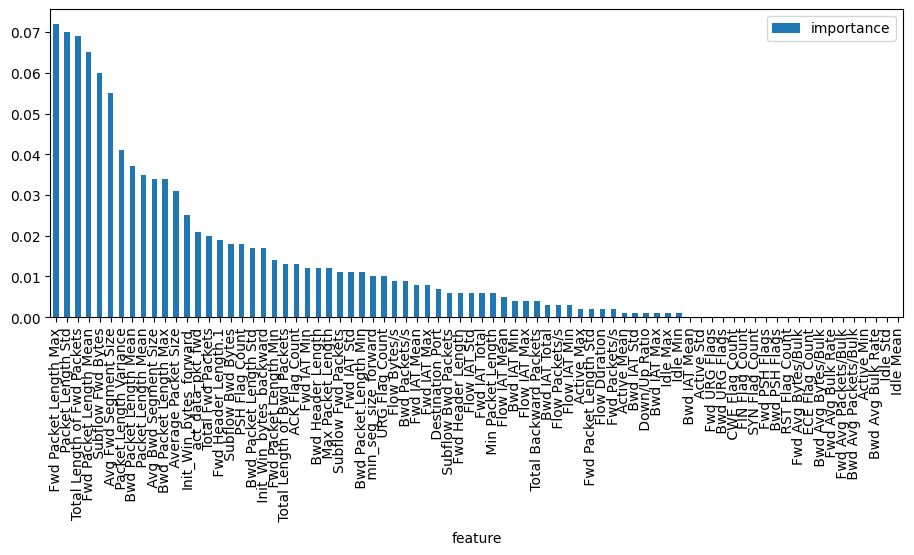

In [16]:
#Feature Selection
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_X, train_y);

# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':train_X.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create and fit the RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(train_X, train_y)

# Get feature importances
feature_importances = rfc.feature_importances_

# Sort indices of features by importance
indices = np.argsort(feature_importances)[::-1]

# Select top k features (adjust k as needed)
k = 20
selected_features = train_X.columns[indices][:k]

selected_features



Index(['Total Length of Fwd Packets', ' Subflow Fwd Bytes',
       ' Fwd Packet Length Max', ' Fwd Packet Length Mean',
       ' Avg Fwd Segment Size', ' Packet Length Std', ' Average Packet Size',
       ' Packet Length Variance', ' Avg Bwd Segment Size',
       'Init_Win_bytes_forward', ' Bwd Packet Length Mean', ' PSH Flag Count',
       ' Packet Length Mean', ' Bwd Packet Length Std', ' Max Packet Length',
       ' Fwd Header Length', ' Fwd Header Length.1', 'Subflow Fwd Packets',
       ' act_data_pkt_fwd', 'Bwd Packet Length Max'],
      dtype='object')

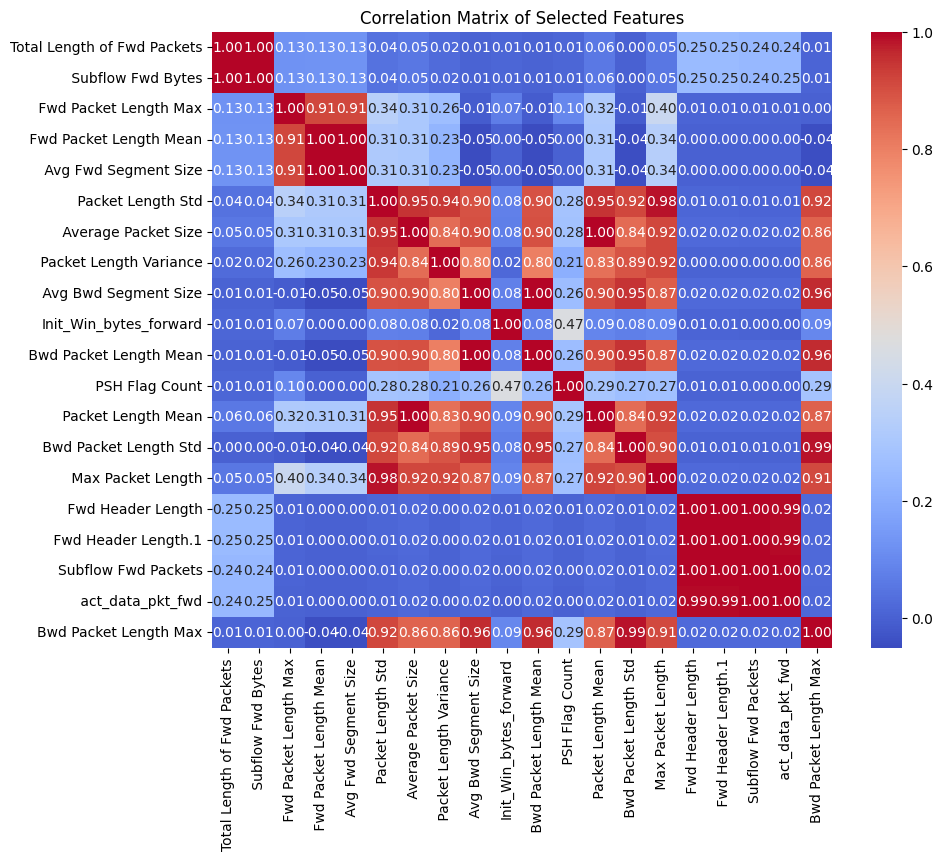

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Subset the original correlation matrix based on selected features
selected_corr_matrix = train_X[selected_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(selected_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()


In [19]:
# Assuming 'feature_map' contains the selected features from the RandomForestClassifier
a = indices[:k]

# Select the columns based on the indices in 'a'
train_X = train_X.iloc[:, a]
test_X = test_X.iloc[:, a]


In [20]:
#Dataset Partition
X_train,X_test,Y_train,Y_test = train_test_split(train_X,train_y,train_size=0.70, random_state=2)

In [21]:
X_train.shape

(569484, 20)

In [22]:
Y_train

array([0., 1., 1., ..., 1., 0., 1.])

In [23]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Build the feedforward neural network model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test))

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
17797/17797 [==============================] - 123s 7ms/step - loss: 0.1964 - accuracy: 0.9070 - val_loss: 0.1372 - val_accuracy: 0.9888
Epoch 2/10
17797/17797 [==============================] - 91s 5ms/step - loss: 0.1041 - accuracy: 0.9792 - val_loss: 0.0768 - val_accuracy: 0.9917
Epoch 3/10
17797/17797 [==============================] - 72s 4ms/step - loss: 0.0615 - accuracy: 0.9916 - val_loss: 0.0507 - val_accuracy: 0.9922
Epoch 4/10
17797/17797 [==============================] - 79s 4ms/step - loss: 0.0436 - accuracy: 0.9923 - val_loss: 0.0396 - val_accuracy: 0.9899
Epoch 5/10
17797/17797 [==============================] - 71s 4ms/step - loss: 0.0366 - accuracy: 0.9923 - val_loss: 0.0353 - val_accuracy: 0.9928
Epoch 6/10
17797/17797 [==============================] - 78s 4ms/step - loss: 0.0346 - accuracy: 0.9926 - val_loss: 0.0348 - val_accuracy: 0.9906
Epoch 7/10
17797/17797 [==============================] - 70s 4ms/step - loss: 0.0321 - accuracy: 0.9928 - val_loss: 

7628/7628 [==============================] - 12s 2ms/step


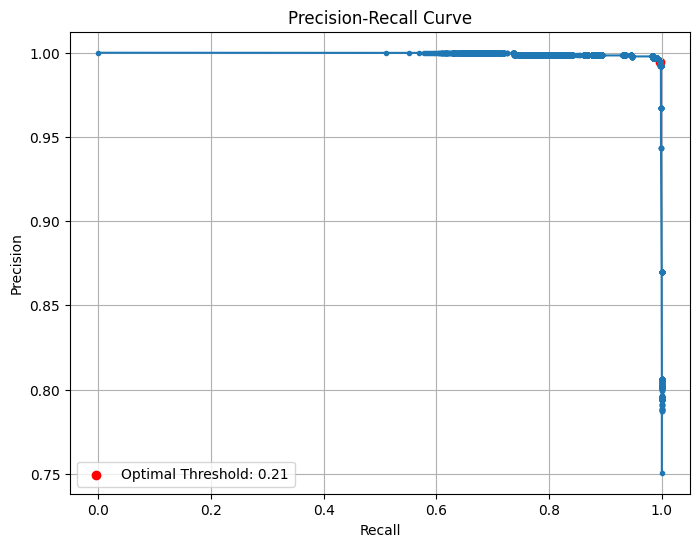

Precision : 0.994339304278724
Recall : 0.9971670614949618
Optimal Threshold: 0.21430074


In [24]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Make predictions on test data
Y_pred = model.predict(X_test)

# Calculate precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)

# Find the threshold that maximizes the F1-score
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Calculate precision and recall at the optimal threshold
precision_optimal = precision[np.argmax(f1_scores)]
recall_optimal = recall[np.argmax(f1_scores)]

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.scatter(recall_optimal, precision_optimal, color='red', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

print("Precision :", precision_optimal)
print("Recall :", recall_optimal)
print("Optimal Threshold:", optimal_threshold)


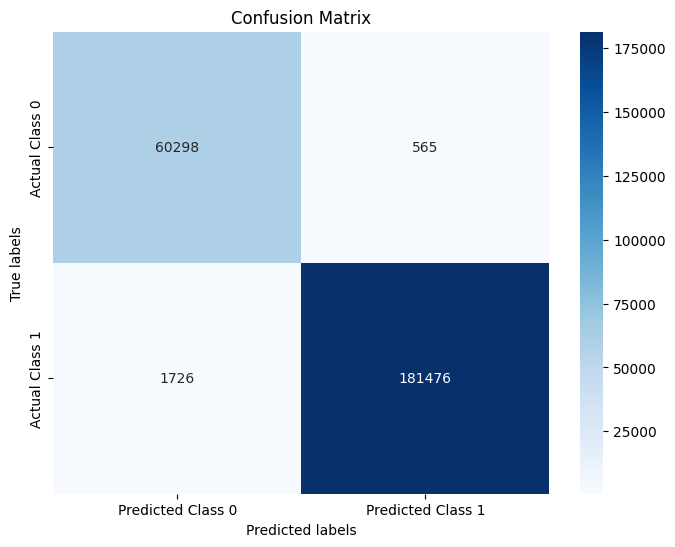

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert predicted probabilities to class labels
Y_pred_rnn_classes = (Y_pred > 0.5).astype(int)

# Compute confusion matrix
conf_matrix_rnn = confusion_matrix(Y_test, Y_pred_rnn_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rnn, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted Class 0', 'Predicted Class 1'], yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



7628/7628 [==============================] - 12s 2ms/step
F1-score: 0.9957511753083055
Optimal Threshold: 0.21212121212121213


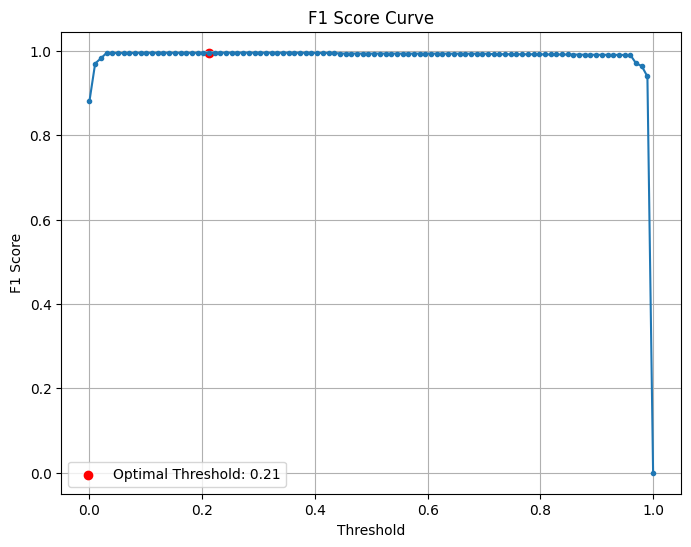

In [26]:
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on test data
Y_pred = model.predict(X_test)

# Calculate F1-score for various thresholds
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(Y_test, (Y_pred > threshold).astype(int)) for threshold in thresholds]

# Find the threshold that maximizes the F1-score
optimal_threshold = thresholds[np.argmax(f1_scores)]

# Calculate the F1-score at the optimal threshold
f1_optimal = max(f1_scores)

print("F1-score:", f1_optimal)
print("Optimal Threshold:", optimal_threshold)

# Plot F1 score curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, marker='.')
plt.scatter(optimal_threshold, f1_optimal, color='red', label=f'Optimal Threshold: {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score Curve')
plt.legend()
plt.grid(True)
plt.show()

